In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#adding a new column
df['total_spend']=df['TV']+df['radio']+df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


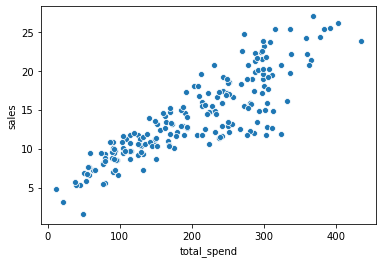

In [6]:
#checking relation between sales and total_spend
sns.scatterplot(data=df,x='total_spend',y='sales')

In [7]:
#the more the spend , the more is the sales

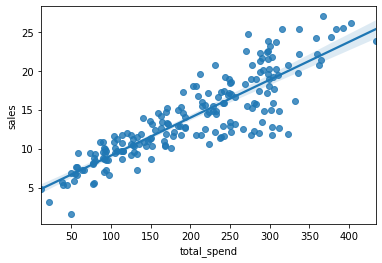

In [8]:

sns.regplot(data=df,x='total_spend',y='sales')

In [9]:
X=df['total_spend']
y=df['sales']

In [10]:
np.polyfit(X,y,deg=1) #we get b0 and b1

array([0.04868788, 4.24302822])

In [11]:
potential_spend=np.linspace(0,500,100) #getting some X values
#so that using b0 and b1 we get potential y values

In [12]:
predicted_sales=0.04868788*potential_spend+4.24302822

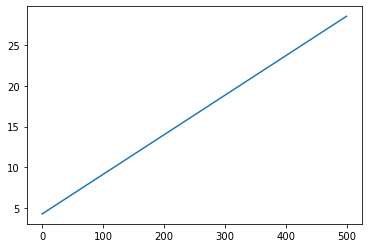

In [13]:
plt.plot(potential_spend,predicted_sales)

In [14]:
# ###Blue print 

# from sklearn.model_family import ModelAlgo
# mymodel=ModelAlgo(param1,param2)
# mymodel.fit(X_train,y_train)
# predictions=mymodel.predict(X_test)
# from sklearn.metrics import error_metric
# performance=error_metric(y_test,predictions)

In [15]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [16]:
df=df.drop(labels='total_spend',axis=1)

In [17]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


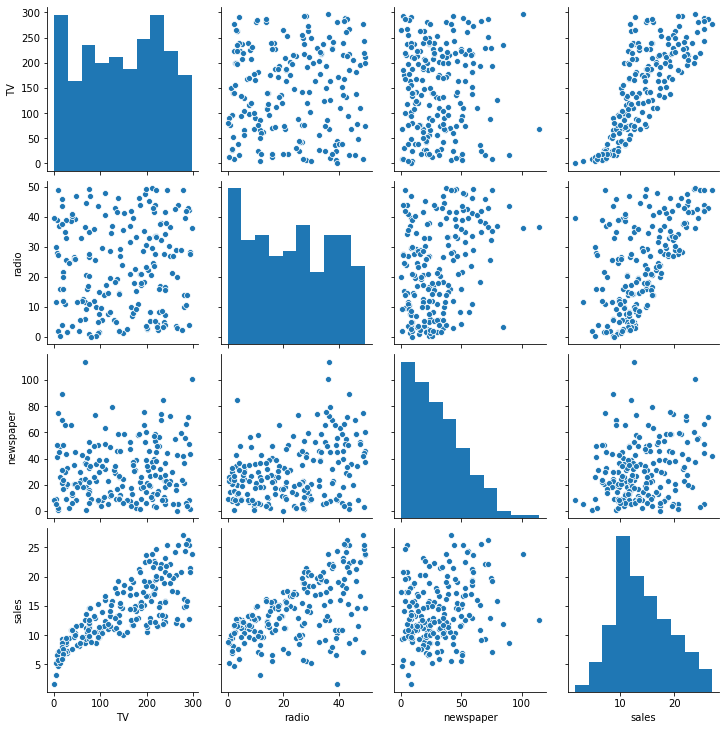

In [18]:
sns.pairplot(df)

In [19]:
X=df.drop('sales',axis=1)

In [20]:
y=df['sales']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
len(df)

200

In [24]:
X_train.shape,X_test.shape

((134, 3), (66, 3))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
#help(LinearRegression)

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
predictions=model.predict(X_test)

### Metrics

* MAE
* MSE(larger errors are punished more compared to MAE)
* RMSE (best)

The acceptable value of RMSE depends on the context or the domain or any historical performance

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
import seaborn as sns

In [32]:
#sns.histplot(data=df,x='sales')

In [33]:
#!pip install -U seaborn

In [34]:
mean_absolute_error(y_test,predictions)

1.4937750024728964

In [35]:
mean_squared_error(y_test,predictions)

3.7279283306815074

In [36]:
np.sqrt(mean_squared_error(y_test,predictions)) #RMSE

1.9307843822347195

In [37]:
## residual error to evaluate my model and we want it to be centered around zero

#residual error vs true value

test_residuals=y_test-predictions

In [38]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

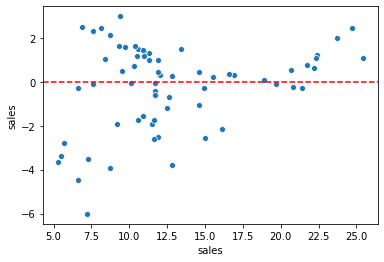

In [39]:
#residual plot
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

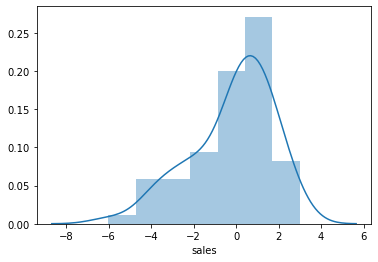

In [40]:
sns.distplot(test_residuals,kde=True)

In [41]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


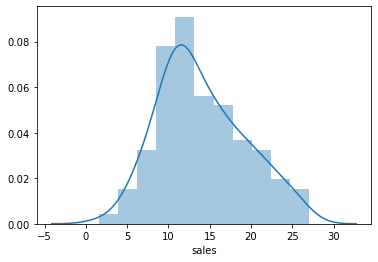

In [42]:
sns.distplot(df['sales'],hist=True)

In [43]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [45]:
final_model=LinearRegression()

In [46]:
final_model.fit(X,y)

LinearRegression()

In [47]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


So the coefficient for newspaper is almost zero which indicates that it has almost no effect on sales

In [49]:
y_hat=final_model.predict(X)

In [50]:
from joblib import dump,load
# these allows us to dump or save the model

In [51]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [52]:
loaded_model=load('final_sales_model.joblib')
# loading the pretrained model

In [53]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [54]:
X.shape

(200, 3)

In [55]:
#lets spend 149 TV,22 radio,12 Newspaper
campaign=[[149,22,12]]

In [56]:
# so now to predict the sales
loaded_model.predict(campaign)

array([13.893032])

### Polynomial Regression

In [57]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [59]:
X=df.drop('sales',axis=1)

In [60]:
y=df['sales']

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
# now Polynomial features takes several parameters
#out of those the most important are degree and interaction_only
# by choosing degress we can choose to have the features increased by transformations of initial features like degree=2
#interaction_only=True will have here TV X radio, TV  X newspaper and so on

In [64]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [66]:
poly_features=polynomial_converter.transform(X)
# it transforms the model to 2nd degree polynomial

In [67]:
X.shape,poly_features.shape

((200, 3), (200, 9))

* we can see that the no of features increases from 3 to 9

In [68]:
#polynomial_converter.fit_transform(X)
# it fits and transforms the data in a single step

In [69]:
from sklearn.model_selection import train_test_split

Here we spli the poly_features instead of the original X as poly_features has more features and is the transfrmed version of original X

In [70]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model=LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred=model.predict(X_test)

In [76]:
X_train.shape

(140, 9)

In [77]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.4896798044803514

In [82]:
MSE=mean_squared_error(y_test,y_pred)
MSE

0.441750551040334

In [83]:
RMSE=np.sqrt(MSE)
RMSE

0.6646431757268964

In [84]:
### SO concue by comparing the model metrics that polynomial regression performs better compared to simple linear regression

### adjusting model parameter

In [85]:
#create the different order poly
#split poly feat train/test
# ft on train
#store/save the rmse for both train and test set
#plot the results (error vs poly order)

In [86]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [87]:
train_rmse_errors 
#as model complexity increases, i.e. degree of polynomial the train rmse falls

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.351708368839936,
 0.25093429774804465,
 0.19932622962640728,
 5.418481211251695,
 0.15084908815111234,
 0.17175424525657304]

In [89]:
test_rmse_errors
# In case of test rmse errors at first with increasing model complexity 
# increases error falls but after sometime the error explodes

[1.516151937599388,
 0.6646431757268964,
 0.5803286825240506,
 0.5077742643560029,
 2.5758094207966096,
 4.265809430015621,
 1383.4052945431386,
 3733.4225667016804,
 95489.2645229333]

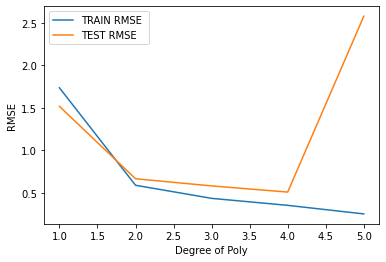

In [91]:
plt.plot(range(1,6),train_rmse_errors[:5],label="TRAIN RMSE ")
plt.plot(range(1,6),test_rmse_errors[:5],label="TEST RMSE")

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

Here we see that choosing2, 3 or 4 as degree of polynomial leads to low rmse for train as well as test

### Model Deployment

In [92]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [93]:
final_model=LinearRegression()

In [94]:
fully_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(fully_converted_X,y)

LinearRegression()

In [95]:
from joblib import dump,load

In [96]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [97]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [98]:
loaded_converter=load('final_converter.joblib')

In [99]:
loaded_model=load('final_poly_model.joblib')

In [100]:
campaign=[[149,22,12]]

In [101]:
transformed_data=loaded_converter.fit_transform(campaign)

In [102]:
loaded_model.predict(transformed_data)

array([14.64501014])